In [1]:
import sqlite3
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
conn = sqlite3.connect('pyadina-24-08-23.db')
cursor = conn.execute("select distinct date from orders")
dat = cursor.fetchall()
print(dat)

[('18.08.2023',), ('19.08.2023',), ('20.08.2023',), ('21.08.2023',), ('22.08.2023',), ('23.08.2023',)]


In [3]:
de_eint_x = []
de_eint = 0
de_scharf_x = []
de_scharf = 0
de_vegi_x = []
de_vegi = 0
y = []

In [4]:
for d in dat:
    sql = "SELECT * FROM orders where date='{d}'".format(d=d[0])
    cursor = conn.execute(sql)
    rows = cursor.fetchall()
    print(rows)

    for row in rows:
        jsn = json.loads(row[5])
        de_eint = de_eint + jsn['0']
        de_scharf = de_scharf + jsn['1']
        de_vegi = de_vegi + jsn['2']

        de_eint_x.append(de_eint)
        de_scharf_x.append(de_scharf)
        de_vegi_x.append(de_vegi)
        y.append(row[6])

[(6, 1, 0, 1, 0, '{"0":0,"1":1,"2":0,"timestamp":"2023-08-17T08:35:43.735Z"}', '18:35:43', '18.08.2023'), (7, 2, 1, 0, 0, '{"0":1,"1":0,"2":0,"timestamp":"2023-08-17T08:35:40.208Z"}', '18:35:40', '18.08.2023'), (8, 3, 1, 1, 0, '{"0":1,"1":1,"2":0,"timestamp":"2023-08-17T08:36:27.987Z"}', '18:36:27', '18.08.2023'), (9, 4, 2, 0, 0, '{"0":2,"1":0,"2":0,"timestamp":"2023-08-17T09:45:04.764Z"}', '19:45:04', '18.08.2023'), (10, 5, 0, 2, 0, '{"0":0,"1":2,"2":0,"timestamp":"2023-08-17T09:50:43.927Z"}', '19:50:43', '18.08.2023'), (11, 6, 0, 0, 1, '{"0":0,"1":0,"2":1,"timestamp":"2023-08-17T09:51:23.711Z"}', '19:51:23', '18.08.2023'), (12, 7, 0, 1, 0, '{"0":0,"1":1,"2":0,"timestamp":"2023-08-17T09:53:58.524Z"}', '19:53:58', '18.08.2023'), (13, 8, 1, 0, 0, '{"0":1,"1":0,"2":0,"timestamp":"2023-08-17T09:58:26.199Z"}', '19:58:26', '18.08.2023'), (14, 9, 1, 1, 0, '{"0":1,"1":1,"2":0,"timestamp":"2023-08-17T10:01:05.040Z"}', '20:01:05', '18.08.2023'), (15, 10, 0, 1, 0, '{"0":0,"1":1,"2":0,"timestamp"

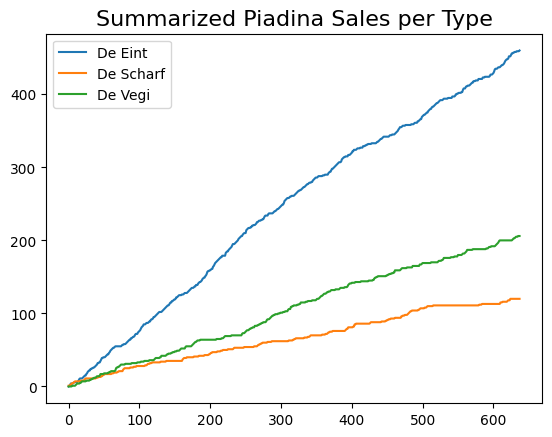

In [5]:
df = pd.DataFrame({
    'period':y,
    'de_eint': de_eint_x,
    'de_scharf': de_scharf_x,
    'de_vegi': de_vegi_x
})

# plot individual lines
plt.plot(df['de_eint'], label='De Eint')
plt.plot(df['de_scharf'], label='De Scharf')
plt.plot(df['de_vegi'], label='De Vegi')

plt.legend()
plt.title('Summarized Piadina Sales per Type', fontsize=16)

# display plot
plt.show()

In [6]:
conn = sqlite3.connect('pyadina-24-08-23.db')
cursor = conn.execute("SELECT json FROM orders where date > '16.08.2023'")
rows = cursor.fetchall()

In [7]:
de_eint = 0
de_scharf = 0
de_vegi = 0
plaettli = 0
PRICE_PER_PIADINA = 12
PLAETTLI_PRICE = 19

In [8]:
for j in rows:
    jsn = json.loads(j[0])
    de_eint = de_eint + jsn['0']
    de_scharf = de_scharf + jsn['1']
    de_vegi = de_vegi + jsn['2']
    if '3' in jsn:
        plaettli = plaettli + jsn['3']


In [9]:
print("de Eint: {cnt}".format(cnt=de_eint))
print("de Scharf: {cnt}".format(cnt=de_scharf))
print("de Vegi: {cnt}".format(cnt=de_vegi))
print("Plättli: {cnt}".format(cnt=plaettli))

de Eint: 460
de Scharf: 120
de Vegi: 206
Plättli: 81


In [10]:
total = de_eint + de_scharf + de_vegi
print("Total {cnt}".format(cnt=total))
print("Umsatz: {cnt:.2f} CHF".format(cnt=(total * PRICE_PER_PIADINA + plaettli * PLAETTLI_PRICE)))

Total 786
Umsatz: 10971.00 CHF


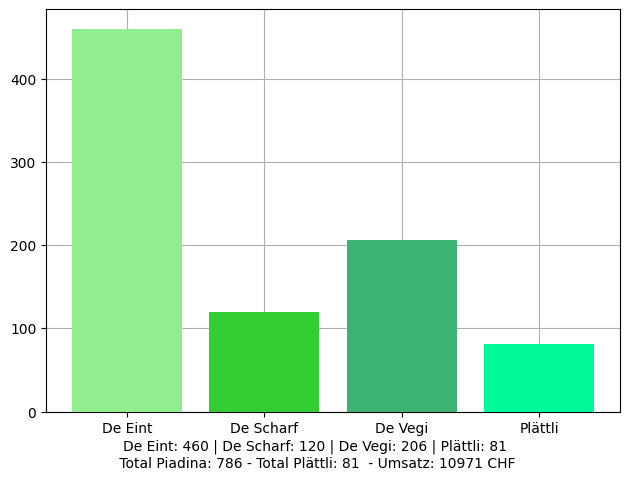

In [11]:
x = ['De Eint', 'De Scharf', 'De Vegi', 'Plättli']
y = [de_eint, de_scharf, de_vegi, plaettli]

fig, br = plt.subplots()
br.grid(zorder=0)
br.bar(x, y, color=['lightgreen', 'limegreen', 'mediumseagreen', 'mediumspringgreen'], zorder=3)
text = fig.text(.5,
                .02,
                "De Eint: {de_eint} | De Scharf: {de_scharf} | De Vegi: {de_vegi} | Plättli: {plaettli}\n Total Piadina: {total} - Total Plättli: {total_plaettli}  - Umsatz: {umsatz} CHF"
                .format(de_eint=de_eint,
                        de_scharf=de_scharf,
                        de_vegi=de_vegi,
                        plaettli=plaettli,
                        total=total,
                        total_plaettli=plaettli,
                        umsatz=(total * PRICE_PER_PIADINA + plaettli * PLAETTLI_PRICE)),
                horizontalalignment='center', wrap=True)
fig.tight_layout(rect=(0, .05, 1, 1))
plt.show()
